In [10]:
#importiamo le librerie di base
import numpy as np 
import pandas as pd 
import librosa.display  # questa sereve per la rappresentazione grafica e gestione di file audio
import matplotlib.pyplot as plt  # serve per calcoli matematic 

In [11]:
#importiamo il dataset
music_data = pd.read_csv('Data/features_30_sec.csv') 
music_data_3sec = pd.read_csv('Data/features_3_sec.csv') 

music_data.head(5) #per vedere le prime 5 colonne del dataset



,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [12]:
music_data['label'].value_counts() # andiamo a vedere il n° di dati e tipologia per ogni genere

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [13]:
music_data_3sec['label'].value_counts() # andiamo a vedere il n° di dati e tipologia per ogni genere

label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

Blue


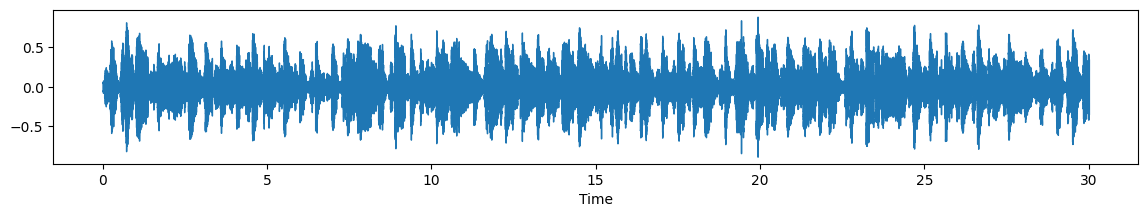

In [14]:
#Stampo la struttura del file audio medio del genere BLUES
path = 'Data/genres_original/blues/blues.00000.wav' 
plt.figure(figsize=(14, 2)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 
  
print("Blue")

In [15]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])

music_data_3sec['label'] = label_encoder.fit_transform(music_data_3sec['label'])

In [16]:
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']

X_3sec = music_data_3sec.drop(['label','filename'],axis=1) 
y_3sec = music_data_3sec['label']

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer

# Creazione di un DataFrame di esempio


# Standardizzazione
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

# Robust Scaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(X)

# MaxAbs Scaler
max_abs_scaler = MaxAbsScaler()
data_max_abs_scaled = max_abs_scaler.fit_transform(X)

# Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='uniform')
data_quantile_scaled = quantile_transformer.fit_transform(X)


print("Standardized Data:\n", data_standardized)
print("Robust Scaled Data:\n", data_robust_scaled)
print("MaxAbs Scaled Data:\n", data_max_abs_scaled)
print("Quantile Transformed Data:\n", data_quantile_scaled)



Standardized Data:
 [[-0.13282213 -0.35013678  0.31258717 ... -0.30059734  0.60406407
  -0.51298758]
 [-0.13282213 -0.46248155  1.11757233 ... -0.40708699  0.42412706
  -0.53842129]
 [-0.13282213 -0.18422456 -0.13770124 ... -0.52729705 -0.29618888
  -0.8749539 ]
 ...
 [-0.13282213  0.65463736 -1.43198917 ... -0.63865065 -0.26361549
  -0.89060474]
 [-0.13282213 -0.19833855  0.66814351 ... -0.5114848  -0.65064889
  -0.63768256]
 [-0.13282213 -0.2483391  -0.05894495 ...  0.16033426  0.5868411
  -0.4526752 ]]
Robust Scaled Data:
 [[ 0.         -0.28406716  0.23911547 ... -0.06393215  0.50999105
  -0.28486901]
 [ 0.         -0.36289952  0.93389623 ... -0.17111348  0.36259004
  -0.3116059 ]
 [ 0.         -0.16764649 -0.14952738 ... -0.29210434 -0.22747925
  -0.66538193]
 ...
 [ 0.          0.42098323 -1.26662419 ... -0.40418121 -0.20079574
  -0.68183469]
 [ 0.         -0.17755028  0.54599529 ... -0.27618938 -0.51784622
  -0.41595316]
 [ 0.         -0.21263568 -0.08155302 ...  0.39999329  0.4

In [18]:
# è la soluzione migliore visto che abbiamo dei dati ben distribuiti
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standardized_3sec = standard_scaler.fit_transform(X_3sec)

In [19]:

#Effettuo l'operazione di split del data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#X_train_3sec, X_test_3sec, y_train_3sec, y_test_3sec = train_test_split(X_standardized_3sec, y_3sec, test_size=0.3, random_state=42)
#X_train_3sec.shape, X_test_3sec.shape, y_train_3sec.shape, y_test_3sec.shape


((700, 58), (300, 58), (700,), (300,))

In [20]:
X_train_3sec, X_test_3sec, y_train_3sec, y_test_3sec = train_test_split(X_standardized_3sec, y_3sec, test_size=0.3, random_state=42)
X_train_3sec.shape, X_test_3sec.shape, y_train_3sec.shape, y_test_3sec.shape

((6993, 58), (2997, 58), (6993,), (2997,))

<H2> KNN


<h3> Definizione della scelta del k Tramite Grid_Search

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definire i possibili valori di K
param_grid = {'n_neighbors': list(range(1, 30))}

# Usare GridSearchCV per trovare il valore ottimale
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search_3sec = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_3sec.fit(X_train_3sec, y_train_3sec)

# Miglior valore di K
print(f"Miglior valore di K: {grid_search.best_params_}")
print(f"Accuracy con il miglior K: {grid_search.best_score_}")

# Miglior valore di K 3 sec
print(f"Miglior valore di K: {grid_search_3sec.best_params_}")
print(f"Accuracy con il miglior K: {grid_search_3sec.best_score_}")

ValueError: 
All the 145 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 1058, in check_array
    raise ValueError(
ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.


Implemento KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Inizializzare il modello KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn_3sec = KNeighborsClassifier(n_neighbors=1)

# Addestrare il modello
knn_3sec.fit(X_train, y_train)
knn.fit(X_train, y_train)




# PROVO A IMPLEMENTARE E FARE MIGLIORAMENTI CON K-FOLD CROSS VALIDATION
# Implementiamo la K-Fold Cross-Validation con StratifiedKFold per preservare le proporzioni delle classi
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
#kf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Fare previsioni sul set di test
y_pred = knn.predict(X_test)
y_pred_3sec = knn_3sec.predict(X_test_3sec)



# Valutare l'accuratezza
accuracy_knn = accuracy_score(y_test, y_pred)
#print(f"KNN Accuracy: {accuracy_knn}")

accuracy_knn_3sec = accuracy_score(y_test_3sec, y_pred_3sec)
#print(f"KNN Accuracy: {accuracy_knn_3sec}")

# Calcoliamo le score di cross-validation (Accuracy)
#cv_scores = cross_val_score(knn, X_train_3sec, y_train_3sec, cv=kf, scoring='accuracy')  #-------------
#cv_scores_ = cross_val_score(knn, X_train, y_train, cv=kf_, scoring='accuracy')  #-------------

# Precision, Recall, F1-Score per classificazione multiclasse
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision_3sec = precision_score(y_test_3sec, y_pred_3sec, average='weighted')
recall_3sec = recall_score(y_test_3sec, y_pred_3sec, average='weighted')
f1_3sec = f1_score(y_test_3sec, y_pred_3sec, average='weighted')

print(" -------------DATASET 30 SEC ----------------")
print(f"KNN Accuracy: {accuracy_knn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(" -------------DATASET 3 SEC ----------------")
print(f"KNN Accuracy: {accuracy_knn_3sec}")
print(f"Precision 3: {precision_3sec:.4f}")
print(f"Recall 3: {recall_3sec:.4f}")
print(f"F1-Score 3: {f1_3sec:.4f}")



#----------------


# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#print(f"Confusion Matrix:\n{conf_matrix}")

# Report dettagliato con Precision, Recall, F1-Score per ciascuna classe

#print("Classification Report:\n", classification_report(y_test, y_pred))


 -------------DATASET 30 SEC ----------------
KNN Accuracy: 0.68
Precision: 0.6912
Recall: 0.6800
F1-Score: 0.6820
 -------------DATASET 3 SEC ----------------
KNN Accuracy: 0.8064731398064732
Precision 3: 0.8099
Recall 3: 0.8065
F1-Score 3: 0.8072


Porvo a Migliorare KNN con K-fold

In [35]:
# PROVO A IMPLEMENTARE E FARE MIGLIORAMENTI CON K-FOLD CROSS VALIDATION
# Implementiamo la K-Fold Cross-Validation con StratifiedKFold per preservare le proporzioni delle classi
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
kf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcoliamo le score di cross-validation (Accuracy)
cv_scores = cross_val_score(knn, X_train_3sec, y_train_3sec, cv=kf, scoring='accuracy')  #-------------
cv_scores_ = cross_val_score(knn, X_train, y_train, cv=kf_, scoring='accuracy')  #-------------


# Stampiamo i risultati
print(" -------------DATASET 3 SEC ----------------")
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation: {np.std(cv_scores)}")


#spieghiamo perche non ci sono miglioramenti (pochi dati ???)
print(" -------------DATASET 30 SEC ----------------")
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores_}")
print(f"Mean Accuracy: {np.mean(cv_scores_)}")
print(f"Standard Deviation: {np.std(cv_scores_)}")

 -------------DATASET 3 SEC ----------------
K-Fold Cross-Validation Accuracy Scores: [0.90207291 0.89706934 0.89063617 0.88483548 0.88340486]
Mean Accuracy: 0.8916037512999783
Standard Deviation: 0.007119597592449979
 -------------DATASET 30 SEC ----------------
K-Fold Cross-Validation Accuracy Scores: [0.75714286 0.64285714 0.59285714 0.62142857 0.67142857]
Mean Accuracy: 0.6571428571428571
Standard Deviation: 0.056242913385798635


<H1>RANDOM FOREST

In [36]:
import time
import catboost as cb 
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass') 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 


print(" -------------DATASET 30 SEC ----------------")

for clf in (rf, xgb, cbc): 
    start = time.time() 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test, preds))
    print(clf.__class__.__name__,precision_score(y_test, preds, average='macro'))
    #print(f"Random Forest Accuracy: {accuracy_score}")
    #print("Classification Report:\n", classification_report(y_test, preds))


print(" -------------DATASET 3 SEC ----------------")

for clf in (rf, xgb, cbc): 
    start = time.time() 
    clf.fit(X_train_3sec, y_train_3sec) 
    preds_3sec = clf.predict(X_test_3sec) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test_3sec, preds_3sec))
    print(clf.__class__.__name__,precision_score(y_test_3sec, preds_3sec, average='macro'))
    

 -------------DATASET 30 SEC ----------------
RandomForestClassifier 0.7366666666666667
RandomForestClassifier 0.7498736327287332
XGBClassifier 0.7366666666666667
XGBClassifier 0.7416375837112141
CatBoostClassifier 0.7933333333333333
CatBoostClassifier 0.801400178512603
 -------------DATASET 3 SEC ----------------
RandomForestClassifier 0.8131464798131465
RandomForestClassifier 0.8144316587493936
XGBClassifier 0.9069069069069069
XGBClassifier 0.9067813786795493
CatBoostClassifier 0.9099099099099099
CatBoostClassifier 0.9095304623348828


Proviamo Ad Applicare la Corss validation 

In [37]:
from sklearn.model_selection import cross_val_score


print(" -------------DATASET 30 SEC ----------------")
# Cross-validation per RandomForest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

# Cross-validation per CatBoost
cv_scores_catboost = cross_val_score(cbc, X_train, y_train, cv=5, scoring='accuracy')
print(f"CatBoost CV Accuracy: {cv_scores_catboost.mean()}")

# Cross-validation per XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean()}")



#Capire perche con k-fold peggiora invece di migliorare
print(" -------------DATASET 3 SEC ----------------")

# Cross-validation per RandomForest
cv_scores_rf = cross_val_score(rf, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

# Cross-validation per CatBoost
cv_scores_catboost = cross_val_score(cbc, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"CatBoost CV Accuracy: {cv_scores_catboost.mean()}")

# Cross-validation per XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean()}")

 -------------DATASET 30 SEC ----------------
Random Forest CV Accuracy: 0.7685714285714285
CatBoost CV Accuracy: 0.8
XGBoost CV Accuracy: 0.7542857142857142
 -------------DATASET 3 SEC ----------------
Random Forest CV Accuracy: 0.7953666066401405
CatBoost CV Accuracy: 0.8827399706105219
XGBoost CV Accuracy: 0.8846000771039195


In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier




svc = SVC(kernel= "sigmoid", gamma  = 1.0)
#mnb = MultinomialNB()
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)


print(" -------------DATASET 30 SEC ----------------")

for clf in (svc,lrc,abc,bc,etc): 
    start = time.time() 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test, preds))
    print(clf.__class__.__name__,precision_score(y_test, preds, average='macro'))
    #print(f"Random Forest Accuracy: {accuracy_score}")
    #print("Classification Report:\n", classification_report(y_test, preds))


print(" -------------DATASET 3 SEC ----------------")

for clf in (svc,lrc,abc,bc,etc): 
    start = time.time() 
    clf.fit(X_train_3sec, y_train_3sec) 
    preds_3sec = clf.predict(X_test_3sec) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test_3sec, preds_3sec))
    print(clf.__class__.__name__,precision_score(y_test_3sec, preds_3sec, average='macro'))





 -------------DATASET 30 SEC ----------------
SVC 0.26
SVC 0.28533858989365746
LogisticRegression 0.7033333333333334
LogisticRegression 0.7177606314967284


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier 0.31666666666666665
AdaBoostClassifier 0.18494294586036802


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BaggingClassifier 0.72
BaggingClassifier 0.7242822822822823
ExtraTreesClassifier 0.7633333333333333
ExtraTreesClassifier 0.7722820465979034
 -------------DATASET 3 SEC ----------------
SVC 0.1788455121788455
SVC 0.19274626451304552
LogisticRegression 0.7217217217217218
LogisticRegression 0.7162246849032571


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier 0.46479813146479815
AdaBoostClassifier 0.44677936846288324
BaggingClassifier 0.8278278278278278
BaggingClassifier 0.8295227266981163
ExtraTreesClassifier 0.8768768768768769
ExtraTreesClassifier 0.8767423098339322


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 58, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 29, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 29, 1, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 1, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 7, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,778 (815.54 KB)

 Trainable params: 208,778 (815.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1130 - loss: 5799.0771 - val_accuracy: 0.1639 - val_loss: 4.5755
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1306 - loss: 6.0098 - val_accuracy: 0.1557 - val_loss: 3.3136
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1245 - loss: 3.5786 - val_accuracy: 0.1551 - val_loss: 3.3964
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1407 - loss: 3.5041 - val_accuracy: 0.1432 - val_loss: 2.7728
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1381 - loss: 2.8028 - val_accuracy: 0.1420 - val_loss: 2.6739
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1364 - loss: 2.6786 - val_accuracy: 0.1376 - val_loss: 2.7024
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1359 - loss: 2.6986 - val_accuracy: 0.1345 - val_loss: 2.5078
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1272 - loss: 2.4984 - val_accuracy:

<Figure size 2000x1500 with 0 Axes>

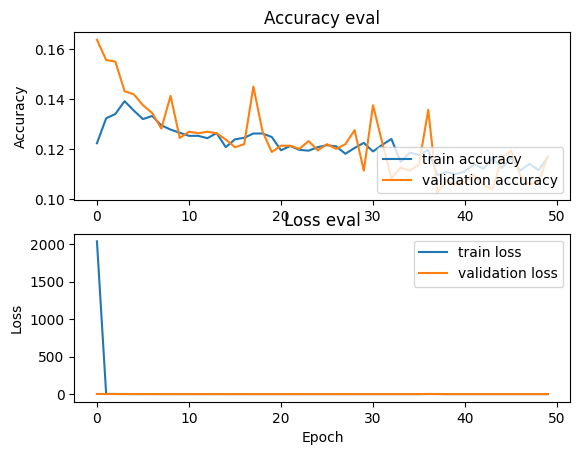

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1252 - loss: 2.2597
Test accuracy: 0.1111111119389534


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Passaggio 1: Caricare i dati dal file CSV e pre-elaborarli
def prepare_dataset(csv_file, test_size, validation_size):
    df = pd.read_csv(csv_file)

    # Supponiamo che la colonna 'label' contenga le etichette e le altre colonne siano le feature
    X = df.drop(columns=['label', 'filename']).values  # Rimuovi le colonne non numeriche
    y = df['label'].values

    # Convertire le etichette da stringhe a numeri
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Suddividere i dati in training, validation e test set
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size)

    # Convertire tutto in float32
    X_train = X_train.astype(np.float32)
    X_val = X_val.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_val = y_val.astype(np.float32)
    y_test = y_test.astype(np.float32)

    # Aggiungere un asse ai dati per adattarli all'input richiesto dalla CNN
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test

# Passaggio 2: Preparare i dati
csv_file = 'Data/features_30_sec.csv'  # Il file CSV deve contenere le features e una colonna 'label'
#X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(csv_file, test_size=0.2, validation_size=0.2)

# Passaggio 3: Definire il modello CNN
model = Sequential()

# Primo strato convoluzionale
model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1))) 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))  # Cambia il kernel di MaxPooling2D

# Secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))  # Cambia il kernel di MaxPooling2D

# Terzo strato convoluzionale
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))  # Cambia il kernel di MaxPooling2D

# Appiattimento (Flatten) della matrice
model.add(Flatten())

# Strato denso (completamente connesso)
model.add(Dense(128, activation='relu'))

# Strato di dropout per ridurre l'overfitting
model.add(Dropout(0.5))

# Strato di output con softmax per classificazione multiclasse
model.add(Dense(10, activation='softmax'))  # Supponiamo 10 classi nel tuo problema

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostra il riepilogo del modello
model.summary()

# Passaggio 4: Addestramento del modello
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Funzione per tracciare i risultati dell'addestramento
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)

    # Accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Loss subplot
    axs[1].plot(hist.history["loss"], label="train loss")
    axs[1].plot(hist.history["val_loss"], label="validation loss")    
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")
    
    plt.show()

# Tracciamento delle performance durante l'addestramento
plot_history(hist)

# Valutazione del modello sui dati di test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 58, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 29, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 29, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 29, 1, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 1, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 7, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,778 (815.54 KB)

 Trainable params: 208,778 (815.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1046 - loss: 14555.0742 - val_accuracy: 0.1013 - val_loss: 129.6892 - learning_rate: 1.0000e-04
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1003 - loss: 2948.9307 - val_accuracy: 0.1026 - val_loss: 5.2620 - learning_rate: 1.0000e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1053 - loss: 705.1379 - val_accuracy: 0.1044 - val_loss: 4.9993 - learning_rate: 1.0000e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0925 - loss: 249.6667 - val_accuracy: 0.1057 - val_loss: 4.8583 - learning_rate: 1.0000e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0911 - loss: 111.4646 - val_accuracy: 0.1088 - val_loss: 4.7353 - learning_rate: 1.0000e-04
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0961 - loss: 62.5000 - val_accuracy: 0.1088 - val_loss: 4.6495 - learning_rate: 1.0000e-04
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/s

<Figure size 2000x1500 with 0 Axes>

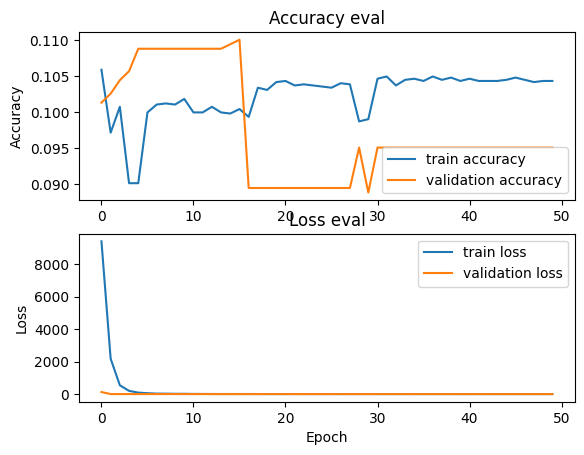

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0980 - loss: 3.6542
Test accuracy: 0.08908908814191818


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Passaggio 1: Caricare i dati dal file CSV e pre-elaborarli
def prepare_dataset(csv_file, test_size, validation_size):
    df = pd.read_csv(csv_file)

    # Supponiamo che la colonna 'label' contenga le etichette e le altre colonne siano le feature
    X = df.drop(columns=['label', 'filename']).values  # Rimuovi le colonne non numeriche
    y = df['label'].values

    # Convertire le etichette da stringhe a numeri
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Suddividere i dati in training, validation e test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size)

    # Convertire tutto in float32
    X_train = X_train.astype(np.float32)
    X_val = X_val.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_val = y_val.astype(np.float32)
    y_test = y_test.astype(np.float32)

    # Aggiungere un asse ai dati per adattarli all'input richiesto dalla CNN
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test

# Passaggio 2: Preparare i dati
csv_file = 'Data/features_3_sec.csv'  # Il file CSV deve contenere le features e una colonna 'label'
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(csv_file, test_size=0.2, validation_size=0.2)

# Definizione del modello CNN con aggiunta di Dropout e L2 Regularization
model = Sequential()

# Primo strato convoluzionale
model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1))) 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Terzo strato convoluzionale
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Appiattimento (Flatten) della matrice
model.add(Flatten())

# Strato denso (completamente connesso)
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Strato di output con softmax per classificazione multiclasse
model.add(Dense(10, activation='softmax'))

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostra il riepilogo del modello
model.summary()

# Callback per ridurre il learning rate se la loss non migliora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Addestramento del modello
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[reduce_lr])

# Funzione per tracciare i risultati dell'addestramento
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)

    # Accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Loss subplot
    axs[1].plot(hist.history["loss"], label="train loss")
    axs[1].plot(hist.history["val_loss"], label="validation loss")    
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")
    
    plt.show()

# Tracciamento delle performance durante l'addestramento
plot_history(hist)

# Valutazione del modello sui dati di test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


<h3>Voglio far vedere tramite dei grafici per far capire i miglioramenti

Base Model Accuracy: 0.8064731398064732
K-Fold Model Accuracy: 0.8916037512999783


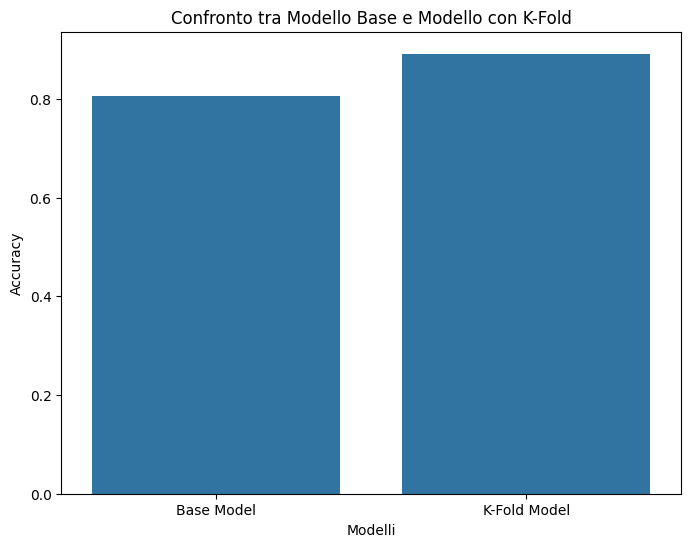

In [38]:
import seaborn as sns

# Calcola l'accuratezza del modello base
accuracy_base = accuracy_score(y_test_3sec, y_pred_3sec)
print(f"Base Model Accuracy: {accuracy_base}")


# Media delle accuratezze su tutte le fold
accuracy_kfold = cv_scores.mean()
print(f"K-Fold Model Accuracy: {accuracy_kfold}")


# Imposta i valori da visualizzare
accuracies = [accuracy_base, accuracy_kfold]
labels = ['Base Model', 'K-Fold Model']

# Crea un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies)

# Aggiungi titoli e etichette
plt.title('Confronto tra Modello Base e Modello con K-Fold')
plt.ylabel('Accuracy')
plt.xlabel('Modelli')

# Mostra il grafico
plt.show()


In [39]:
import pandas as pd
import numpy as np

# Carica il dataset
df = pd.read_csv('Data/features_30_secARG.csv')

# Funzione per aggiungere rumore
def add_noise(data, noise_factor=0.01):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=data.shape)
    return data + noise

# Aggiungi rumore alle features (escludendo la colonna 'label')
augmented_df = df.copy()
features = df.columns.difference(['filename', 'label'])

for feature in features:
    augmented_df[feature + '_noisy'] = add_noise(df[feature])

# Ora 'augmented_df' contiene nuove colonne con dati augmentati
print(augmented_df.head())


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  rms_var_noisy  \
0              2002.449060            85882.761315  ...      -0.008639   
1              2039.036516  

ORA HO INTRODOTTO IL RUMORE IN MODO DA AVERE PIU DATI 